# A. Titanic Dataset (Kaggle)

* Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

> Background: 
> The sinking of the Titanic is one of the most infamous shipwrecks in history.
> On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
> While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

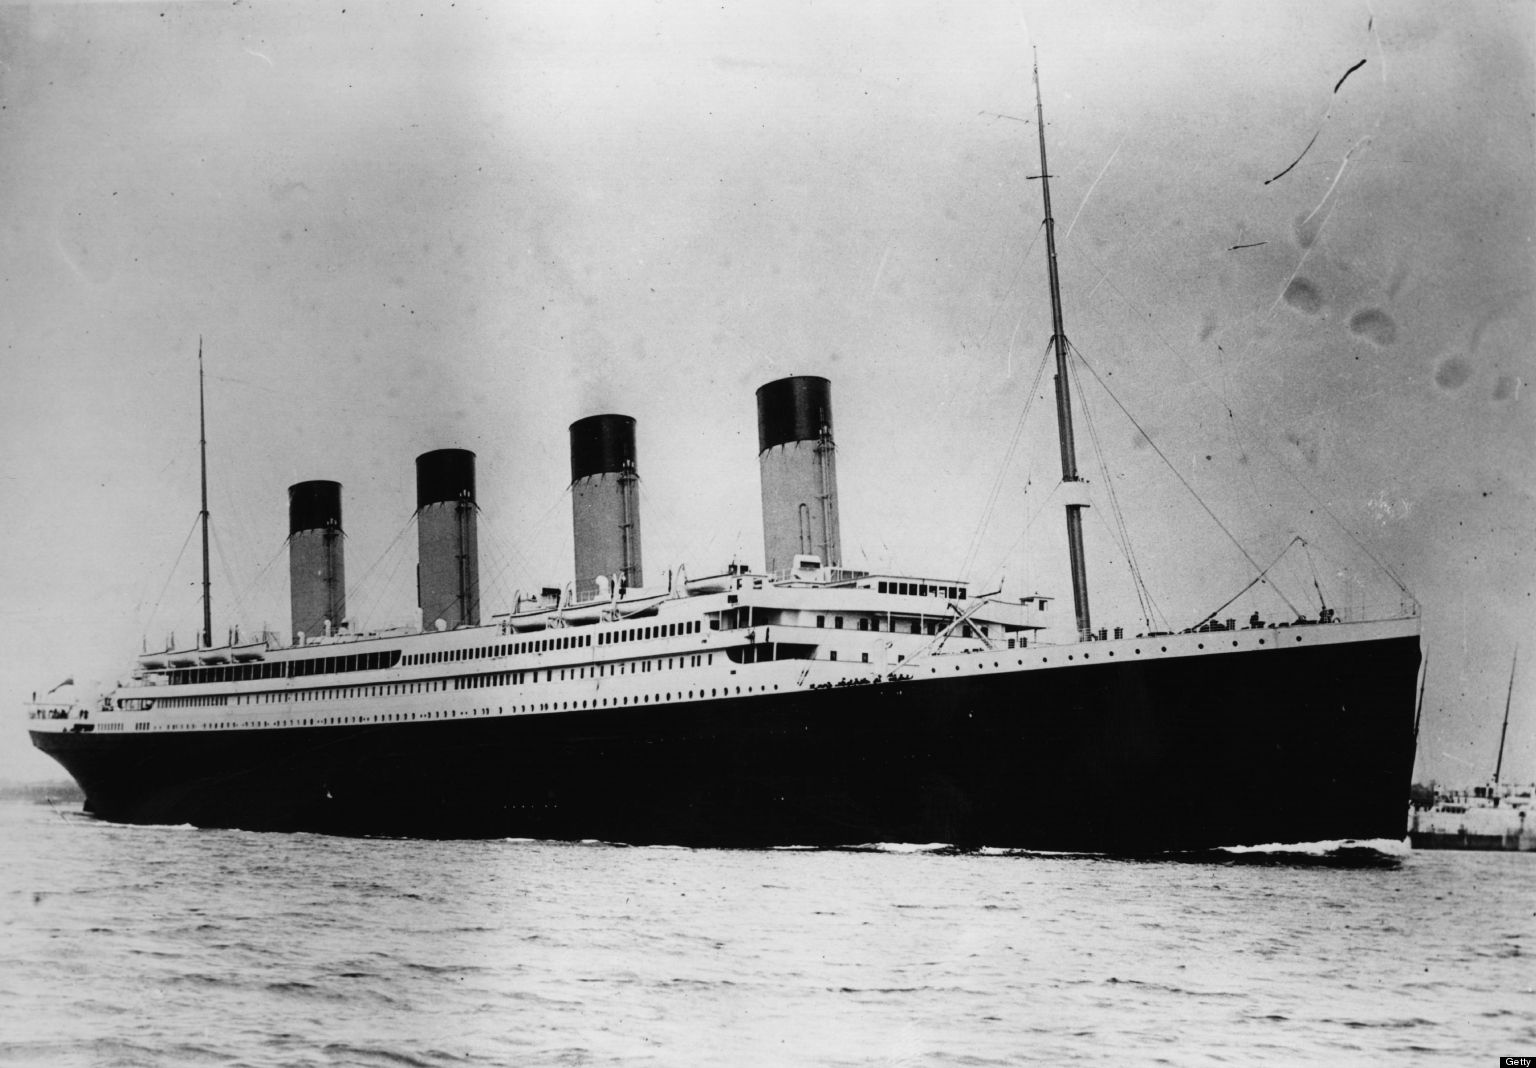

Variables:
* Survived: survival of a passenger (0 = No, 1 = Yes)
* pclass: Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex: Sex (male, female)
* Age: Age in years	
* sibsp: no. of siblings / spouses aboard the Titanic	
* parch: # of parents / children aboard the Titanic	
* ticket: Ticket number	
* fare: Passenger fare	
* cabin: Cabin number	
* embarked: Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

Variable Notes:
> pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

>sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

>parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# B. Tools and Data Preparation

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_source = pd.read_csv("titanic_dataset/train.csv")
test_source = pd.read_csv("titanic_dataset/test.csv")

In [3]:
train_source

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_source

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# Assign the source dataframes to new variables
train = train_source.copy()
test = test_source.copy()

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

For Training Dataset, variables Age, Cabin, and Embarked has null values. We will do some data cleaning data

In [9]:
# For Age values, we will us the average to replace NaN values
train["Age"].fillna(train["Age"].mean(),inplace =True)

# For Cabin, we will drop the columns since number of missing values is more than half of the total data entries and will not have good effect/impact with the analysis
train.drop(["Cabin"],axis=1, inplace=True)

# For Embarked, we will use the value with the most number of instance
train["Embarked"].fillna(train["Embarked"].value_counts().index[0], inplace=True)

In [10]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

For Test Dataset, variables Age, Fare, and Cabin has null values. We will do some data cleaning data

In [11]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# For Age values, we will us the average to replace NaN values
test["Age"].fillna(test["Age"].mean(),inplace =True)

# For Cabin, we will drop the columns since number of missing values is more than half of the total data entries and will not have good effect/impact with the analysis
test.drop(["Cabin"],axis=1, inplace=True)

# For Fare, we will use average to replace NaN values
test["Fare"].fillna(test["Fare"].mean(), inplace=True)

In [13]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## For now, we will consider the following variables:
* Pclass : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex : Sex (male, female)
* Age : Age in years
* SibSp : no. of siblings / spouses aboard the Titanic
* Parch : no. of parents / children aboard the Titanic
* Fare : Passenger fare
* Embarked : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

We will perform Exploratory Data Analysis on the variables

### Pclass (Ticket Class)

In [15]:
pd.crosstab(train["Survived"],train["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [16]:
pd.crosstab(train["Survived"],train["Pclass"]).apply(lambda r: round(r/r.sum(),ndigits=2), axis=0)

Pclass,1,2,3
Survived,,,
0,0.37,0.53,0.76
1,0.63,0.47,0.24


By just checking the frequency of passenger who survived vs those who do not survived, we can see that:
* Those with class 1 tickets has the highest chance of survival
* For class 2 tickets, there's an almost equal change of survival
* Thos with class 3 tickets has lower chance ofsuvival

### Sex (Male or Female)

In [17]:
pd.crosstab(train["Survived"],train["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

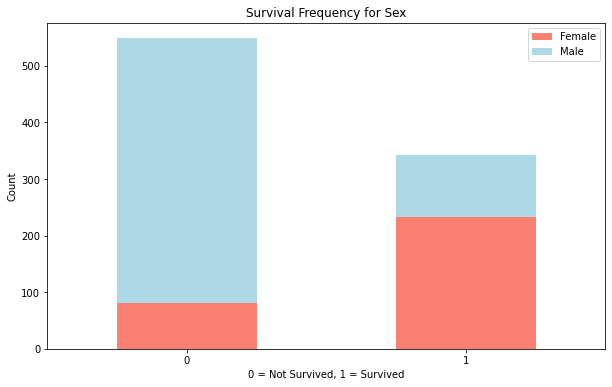

In [18]:
pd.crosstab(train["Survived"],train["Sex"]).plot(kind="bar",
                                         figsize=(10,6),
                                         color=["salmon","lightblue"],stacked=True)
plt.title("Survival Frequency for Sex")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

Based from the figure, we can say that, female passengers has higher chance of survival than of male

### Age (yrs of age)

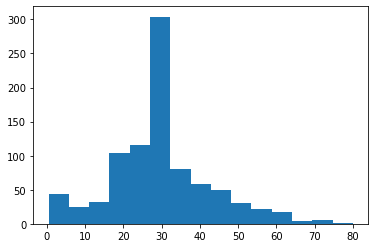

In [19]:
plt.hist(train.Age, bins=15);

Based from the histogram, most of the passengers of Titanic has 30 yrs of age

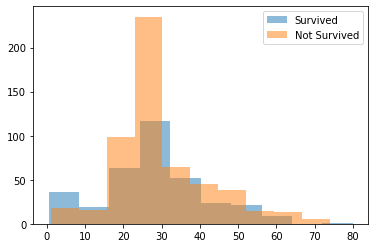

In [20]:
# We'll check if age has effect on the survival change of the passengers
# Show histogram for survived and not survived across ages
plt.hist(train.Age[train["Survived"]==1],
         label='Survived',
         alpha=0.5)
  
plt.hist(train.Age[train["Survived"]==0], 
         label='Not Survived',
         alpha=0.5)
  
plt.legend(loc='upper right')
plt.show()

By comparing the overall survival probability for young passengers(below 20) to older passengers(20 above), we can assume that young passengers has higher survival chance. So we can assume that these passengers are prioritized more in rescuing

### SibSp : no. of siblings / spouses aboard the Titanic

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

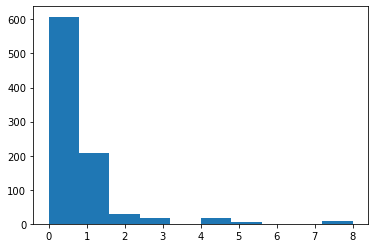

In [21]:
plt.hist(train["SibSp"])

Based on the histogram, we can see that most of the passengers just have 0-1 no. of siblings/spouses aboarded in Titanic. There are few passengers who has many siblings/spouses.

<function matplotlib.pyplot.show(close=None, block=None)>

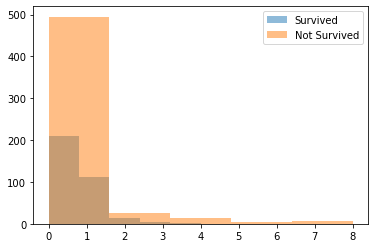

In [22]:
# We'll check if SibSp has effect on the survival change of the passengers
# Show histogram for survived and not survived across ages
plt.hist(train.SibSp[train["Survived"]==1],
         label='Survived',
         alpha=0.5,
         bins=5)
  
plt.hist(train.SibSp[train["Survived"]==0], 
         label='Not Survived',
         alpha=0.5,
         bins=5)
  
plt.legend(loc='upper right')
plt.show

There's no obervable pattern can be seen on the survivality rate based on the no. of siblings/parents aboarded with the passenger

### Parch : no. of parents / children aboard the Titanic

(array([796.,  80.,   5.,   4.,   6.]),
 array([0. , 1.2, 2.4, 3.6, 4.8, 6. ]),
 <BarContainer object of 5 artists>)

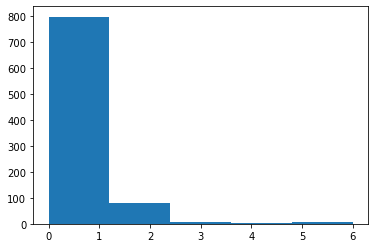

In [23]:
plt.hist(train["Parch"],bins=5)

Based on the histogram, we can see that most of the passengers just have 0-1 no. of parents/children aboarded in Titanic. There are few passengers who has many siblings/spouses.

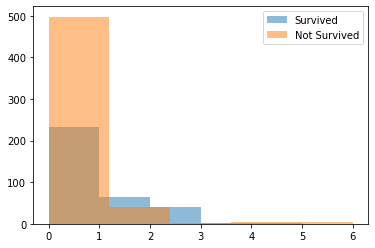

In [24]:
# We'll check if Parch has effect on the survival change of the passengers
# Show histogram for survived and not survived across ages
plt.hist(train.Parch[train["Survived"]==1],
         label='Survived',
         alpha=0.5,
         bins=5)
  
plt.hist(train.Parch[train["Survived"]==0], 
         label='Not Survived',
         alpha=0.5,
         bins=5)
  
plt.legend(loc='upper right')
plt.show()

Based on the overlapping histograms above, we can see that there are more passengers who survived who has around 1-3 parents/children with them.

### Fare : Passenger fare

(array([838.,  33.,  17.,   0.,   3.]),
 array([  0.     , 102.46584, 204.93168, 307.39752, 409.86336, 512.3292 ]),
 <BarContainer object of 5 artists>)

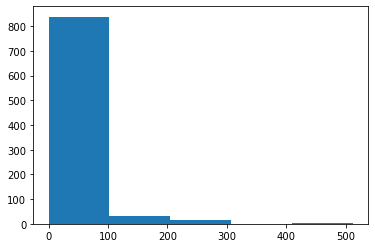

In [25]:
plt.hist(train["Fare"], bins =5)

Based on the histogram, we can see that most of the passengers has paid less than 100 Fare for the trip

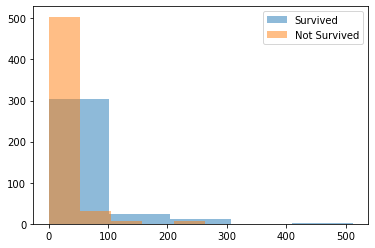

In [26]:
# We'll check if Fare has effect on the survival change of the passengers
# Show histogram for survived and not survived across ages
plt.hist(train.Fare[train["Survived"]==1],
         label='Survived',
         alpha=0.5,
         bins=5)
  
plt.hist(train.Fare[train["Survived"]==0], 
         label='Not Survived',
         alpha=0.5,
         bins=5)
  
plt.legend(loc='upper right')
plt.show()

Based from the graph above, we can see that those who pays 50 or more in their fare has more chance of survival compared to thos who paid below 50

### Embarked : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [27]:
pd.crosstab(train["Survived"],train["Embarked"])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


By looking at the table, Those passengers from Cherbourg has higher chance of survival than that of Queenstown and Southampton
* C =55%, Q=39%, S=34%

## By comparing each feature to the "Survived" passengers, we can say that:
* Class 1 tickets has better chance of survival than Class 3
* Female is more likely to survive than male
* Younger passengers, especially ages 10 below, has higher survival rate than older ages
* With regards to number of siblings/spouses, no evident insights can be deduced
* Those who has 1-3 parents/childrens with them are more likely to survive
* With regards to port of embarkation, those from Cherbourg has more survivors compared to Queenstown and Southampton

# C. Modelling

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
# Split data into x and y
x = train.drop("Survived",axis=1)
y = train["Survived"]

In [30]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [31]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Since the data are already split into x and y:
* now we will deal with the categorical variables Pclass, Sex, and Embarked in order for us to use it in our modelling
* Also we will drop the passengerID, Name, and ticket ID columns (we'll not consider this feature for now)

In [32]:
# generate binary values using get_dummies to transform categorical variables
x = pd.get_dummies(x, columns=["Pclass", "Sex","Embarked"], prefix=["Pclass","Sex","Embarked"] )
x = x.drop(["PassengerId","Name", "Ticket"], axis =1)

In [33]:
x

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1
887,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1
888,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


In [34]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
np.random.seed(13)

# Split into train & test set
train_x, test_x, train_y, test_y = train_test_split(x,
                                                    y,
                                                   test_size=0.2)

In [36]:
train_x

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
711,29.699118,0,0,26.5500,1,0,0,0,1,0,0,1
525,40.500000,0,0,7.7500,0,0,1,0,1,0,1,0
76,29.699118,0,0,7.8958,0,0,1,0,1,0,0,1
626,57.000000,0,0,12.3500,0,1,0,0,1,0,1,0
159,29.699118,8,2,69.5500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
742,21.000000,2,2,262.3750,1,0,0,1,0,1,0,0
528,39.000000,0,0,7.9250,0,0,1,0,1,0,0,1
74,32.000000,0,0,56.4958,0,0,1,0,1,0,0,1
176,29.699118,3,1,25.4667,0,0,1,0,1,0,0,1


In [37]:
train_y

711    0
525    0
76     0
626    0
159    0
      ..
742    1
528    0
74     1
176    0
338    1
Name: Survived, Length: 712, dtype: int64

Now that the data are preprocessed, we can now incorporate it with modelling. Specifically, we'll look into the ff:
* Linear SVM (Support Vector Machine)
* Logistics Regression
* KNN
* Random Forest

In [38]:
#Models from Scikit-learn
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Put models in a dictionary
models = {"SVM_linear": LinearSVC(),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

In [40]:
# Create a function to fit and score models
def fit_and_score(models, train_x, test_x, train_y, test_y):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-learn machine learning models
    train_x: training data (no labels)
    test_x: testing data(no labels)
    train_y: training labels
    test_y: test labels
    """
    # Set random seed
    np.random.seed(13)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(train_x, train_y)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(test_x, test_y)
    return model_scores

In [41]:
model_scores = fit_and_score(models = models,
                            train_x = train_x,
                            test_x = test_x,
                            train_y = train_y,
                            test_y = test_y)

model_scores

C:\Users\balan\Documents\Data Analytics\projects\titanic_kaggle\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\balan\Documents\Data Analytics\projects\titanic_kaggle\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'SVM_linear': 0.6927374301675978,
 'Logistic Regression': 0.8379888268156425,
 'KNN': 0.7374301675977654,
 'Random Forest': 0.8044692737430168}

### Model Comparison

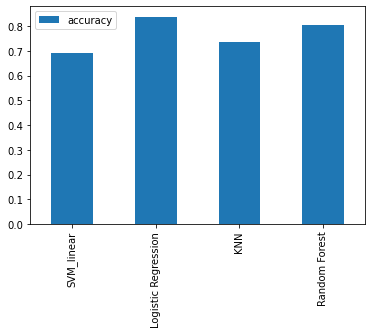

In [42]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Based from the accuracy result, Logistics Regression and Random Forest have better result out of the models.

Now, we're gonna do hyperparameter tuning to see if there is something can be improved.

In [43]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression Tuning

In [44]:
# Define grid search parameters
param_grid_lr = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                 'C' : np.logspace(-4, 4, 20),
                 'max_iter': [100, 1000, 2500, 5000],
                 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 }

In [45]:
# Hyperparameter Tune using Training Data
logModel_grid = GridSearchCV(estimator=LogisticRegression(),
                             param_grid=param_grid_lr,
                             verbose=True,
                             cv = 5,
                             n_jobs=-1)

logModel_grid.fit(train_x, train_y)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\balan\Documents\Data Analytics\projects\titanic_kaggle\env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\balan\Documents\Data Analytics\projects\titanic_kaggle\env\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\balan\Documents\Data Analytics\projects\titanic_kaggle\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [46]:
# Find the best hyperparameters
logModel_grid.best_params_

{'C': 0.08858667904100823,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [47]:
# Evaluate the grid search Logistic Regression model
logModel_grid.score(test_x, test_y)

0.8379888268156425

### RandomForestClassifier

In [48]:
# define diff hyperparamters for our RandomForest model
rf_grid = {'n_estimators': [10, 25],
           'max_features': [5, 10],
           'max_depth': [10, 50, None],
           'bootstrap': [True, False]}

In [49]:
%timeit
# Setup grid hyperparameter search for LogisticRegression
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=5,
                     verbose=True,
                     n_jobs=-1)

# Fit grid hyperparamter search model
gs_rf.fit(train_x,train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, None], 'max_features': [5, 10],
                         'n_estimators': [10, 25]},
             verbose=True)

In [50]:
gs_rf.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}

In [51]:
gs_rf.score(test_x, test_y)

0.8435754189944135

In [52]:
tuned_model = {"gs_logreg": logModel_grid.score(test_x, test_y),
         "gs_rf": gs_rf.score(test_x, test_y)}
tuned_model

{'gs_logreg': 0.8379888268156425, 'gs_rf': 0.8435754189944135}

In [53]:
model_scores

{'SVM_linear': 0.6927374301675978,
 'Logistic Regression': 0.8379888268156425,
 'KNN': 0.7374301675977654,
 'Random Forest': 0.8044692737430168}

Based from the results above. We're gonna select the:
- Tuned RandomForestClassifier model (gs_rf)
- LogisticRegression Model (logModel_grid)


## Evaluating our tuned machine learning classifier, beyond accuracy
We're gonna consider the Logistic Regression and gs_rf for the evaluation.
We'll use the ff for selection:
* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used where possible

To make comparisons and evluate our trained model, first we need to make predictions

In [57]:
y_pred_LR = logModel_grid.predict(test_x)

In [58]:
y_pred_RF = gs_rf.predict(test_x)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

C:\Users\balan\Documents\Data Analytics\projects\titanic_kaggle\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


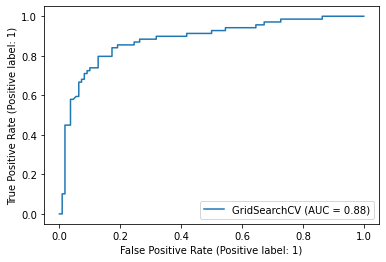

In [60]:
plot_roc_curve(logModel_grid, test_x, test_y)

C:\Users\balan\Documents\Data Analytics\projects\titanic_kaggle\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


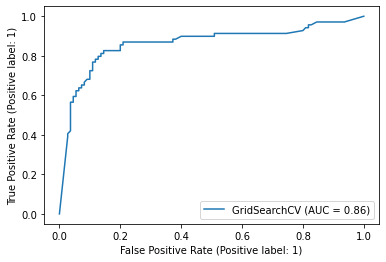

In [61]:
plot_roc_curve(gs_rf, test_x, test_y)

C:\Users\balan\Documents\Data Analytics\projects\titanic_kaggle\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\balan\Documents\Data Analytics\projects\titanic_kaggle\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


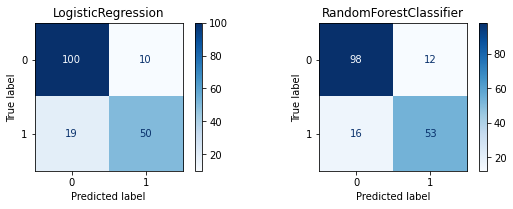

In [68]:
from sklearn.metrics import plot_confusion_matrix

classifiers = [logModel_grid,gs_rf]
title = ['LogisticRegression', 'RandomForestClassifier']
fig, axes = plt.subplots(ncols=2, figsize=(8,3))

for cls, ax, title in zip(classifiers, axes.flatten(), title):
    plot_confusion_matrix(cls, 
                          test_x, 
                          test_y, 
                          ax=ax, 
                          cmap='Blues')
    ax.set_title(title)
plt.tight_layout()  
plt.show()

Based from the confusion matrices:
* LogisticRegression model has more accurate predictions on passengers who didn't survived (Survived = 0)
* RandomForest model has more accurate predictions on passenges who did survived (Survived = 1)

Now we've got a ROC cruve, an AIC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [70]:
print(classification_report(test_y, y_pred_LR))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       110
           1       0.83      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [71]:
print(classification_report(test_y, y_pred_RF))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       110
           1       0.82      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using 'cross_val_score'.

In [72]:
from sklearn.model_selection import cross_val_score

Get the optimal parameters for the Logistic Regression and Random Forest Classifier

In [79]:
logModel_grid.best_params_

{'C': 0.08858667904100823,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [80]:
gs_rf.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}

In [82]:
# Create a new classifier with best paramters
rf_clf = RandomForestClassifier(max_depth= 5,
                                min_samples_leaf= 1,
                                min_samples_split= 12,
                                n_estimators= 110)
lr_clf = LogisticRegression(C = 0.08858667904100823,
                            max_iter = 100,
                            penalty =  'l2',
                            solver =  'newton-cg')

In [83]:
# Union training and test datasets
x = pd.concat([train_x, test_x], ignore_index=True)
y = pd.concat([train_y, test_y], ignore_index=True)

In [84]:
x

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,29.699118,0,0,26.5500,1,0,0,0,1,0,0,1
1,40.500000,0,0,7.7500,0,0,1,0,1,0,1,0
2,29.699118,0,0,7.8958,0,0,1,0,1,0,0,1
3,57.000000,0,0,12.3500,0,1,0,0,1,0,1,0
4,29.699118,8,2,69.5500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,44.000000,0,0,8.0500,0,0,1,0,1,0,0,1
887,4.000000,1,1,23.0000,0,1,0,1,0,0,0,1
888,29.699118,0,0,50.0000,1,0,0,0,1,0,0,1
889,0.750000,2,1,19.2583,0,0,1,1,0,1,0,0


In [85]:
y

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Get Cross-validations for the LogisticRegression

In [87]:
# Cross-validated accuracy
logreg_cv_acc = cross_val_score(lr_clf,
                         x,
                         y,
                         cv=10,
                         scoring = "accuracy")
logreg_cv_acc = np.mean(logreg_cv_acc)

# Cross-validated precision
logreg_cv_precision = cross_val_score(lr_clf,
                         x,
                         y,
                         cv=10,
                         scoring = "precision")
logreg_cv_precision = np.mean(logreg_cv_precision)

# Cross-validated recall
logreg_cv_recall = cross_val_score(lr_clf,
                         x,
                         y,
                         cv=5,
                         scoring = "recall")
logreg_cv_recall = np.mean(logreg_cv_recall)

# Cross-validated f1-score
logreg_cv_f1 = cross_val_score(lr_clf,
                         x,
                         y,
                         cv=5,
                         scoring = "f1")
logreg_cv_f1 = np.mean(logreg_cv_f1)

### Get Cross-validations for the RandomForestClassifier

In [88]:
# Cross-validated accuracy
rf_cv_acc = cross_val_score(rf_clf,
                         x,
                         y,
                         cv=10,
                         scoring = "accuracy")
rf_cv_acc = np.mean(rf_cv_acc)

# Cross-validated precision
rf_cv_precision = cross_val_score(rf_clf,
                         x,
                         y,
                         cv=10,
                         scoring = "precision")
rf_cv_precision = np.mean(rf_cv_precision)

# Cross-validated recall
rf_cv_recall = cross_val_score(rf_clf,
                         x,
                         y,
                         cv=5,
                         scoring = "recall")
rf_cv_recall = np.mean(rf_cv_recall)

# Cross-validated f1-score
rf_cv_f1 = cross_val_score(rf_clf,
                         x,
                         y,
                         cv=5,
                         scoring = "f1")
rf_cv_f1 = np.mean(rf_cv_f1)

In [91]:
#Visualize cross-validated metrics
logreg_cv_metrics = pd.DataFrame({"Accuracy": logreg_cv_acc,
                           "Precision": logreg_cv_precision,
                           "Recall": logreg_cv_recall,
                           "F1": logreg_cv_f1},
                           index =['logreg'])

rf_cv_metrics = pd.DataFrame({"Accuracy": rf_cv_acc,
                           "Precision": rf_cv_precision,
                           "Recall": rf_cv_recall,
                           "F1": rf_cv_f1},
                           index =['rf'])

In [111]:
df= pd.concat([logreg_cv_metrics, rf_cv_metrics]).T
df

,logreg,rf
Accuracy,0.805943,0.826130
Precision,0.786478,0.838251
Recall,0.678303,0.660870
F1,0.725731,0.745689


<BarContainer object of 4 artists>

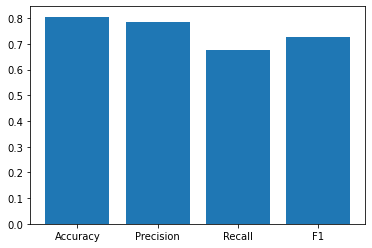

In [116]:
plt.bar(x= df.index, height=df['logreg'])b

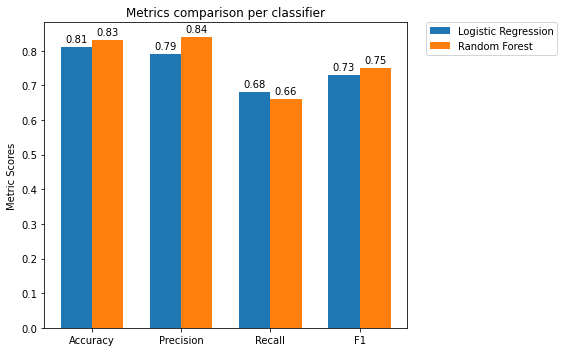

In [121]:
metrics = df.index
lr_scores = round(df.logreg,2)
rf_scores = round(df.rf,2)

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, lr_scores, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Scores')
ax.set_title('Metrics comparison per classifier')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Based from the graph above, we will select Random Forest as our model since out of 4 metrics, 3 of them has higher values than Logistic regression

### Feature importance

Since we already selected a model, now we will check the importance of each feature in our model

In [124]:
gs_rf.fit(train_x,train_y);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [126]:
gs_rf.score(test_x, test_y)

0.8435754189944135

In [128]:
gs_rf.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}

In [133]:
# Fit an instance of RandomForestClassifier
clf = RandomForestClassifier(bootstrap = True,
                             max_depth = 10,
                             max_features = 10,
                             n_estimators = 25)
clf.fit(train_x, train_y);

In [134]:
# Determine feature importance values
importances = clf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

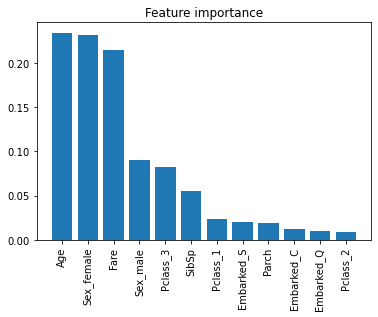

In [137]:
#Visualize the feature importance
plt.title("Feature importance")
plt.bar(range(train_x.shape[1]),
        importances[sorted_indices],
        align="center")
plt.xticks(range(train_x.shape[1]),
           train_x.columns[sorted_indices],
           rotation=90)
plt.show;

Based from the result above, we can say that:
* Age has the highest importance in our model
* Sex being the second
* Third is the Fare

In [139]:
# Getting the output

In [148]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [149]:
# generate binary values using get_dummies to transform categorical variables
test_trans = pd.get_dummies(test, columns=["Pclass", "Sex","Embarked"], prefix=["Pclass","Sex","Embarked"] )
test_trans = test_trans.drop(["PassengerId","Name", "Ticket"], axis =1)

In [150]:
test_trans

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.50000,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.00000,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.00000,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.00000,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.00000,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,0,0,1,0,1,0,0,1
414,39.00000,0,0,108.9000,1,0,0,1,0,1,0,0
415,38.50000,0,0,7.2500,0,0,1,0,1,0,0,1
416,30.27259,0,0,8.0500,0,0,1,0,1,0,0,1


In [152]:
test_predict_rf = gs_rf.predict(test_trans)

In [154]:
test_predict_rf, len(test_predict_rf)

(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [155]:
# Cross-validated accuracy
rf_cv_acc = cross_val_score(rf_clf,
                         test_trans,
                         test_predict_rf,
                         cv=10,
                         scoring = "accuracy")
rf_cv_acc = np.mean(rf_cv_acc)

# Cross-validated precision
rf_cv_precision = cross_val_score(rf_clf,
                         test_trans,
                         test_predict_rf,
                         cv=10,
                         scoring = "precision")
rf_cv_precision = np.mean(rf_cv_precision)

# Cross-validated recall
rf_cv_recall = cross_val_score(rf_clf,
                         test_trans,
                         test_predict_rf,
                         cv=5,
                         scoring = "recall")
rf_cv_recall = np.mean(rf_cv_recall)

# Cross-validated f1-score
rf_cv_f1 = cross_val_score(rf_clf,
                         test_trans,
                         test_predict_rf,
                         cv=5,
                         scoring = "f1")
rf_cv_f1 = np.mean(rf_cv_f1)

In [161]:
#Visualize cross-validated metrics
rf_cv_metrics = pd.DataFrame({"Accuracy": rf_cv_acc,
                           "Precision": rf_cv_precision,
                           "Recall": rf_cv_recall,
                           "F1": rf_cv_f1},
                           index =['rf'])
df = rf_cv_metrics.T
df

,rf
Accuracy,0.889895
Precision,0.881293
Recall,0.696923
F1,0.792453


In [170]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': test_predict_rf})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
